<a href="https://colab.research.google.com/github/Christer-L/Microfluidics/blob/master/microfabrication_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd ..
# Load the Drive helper and mount
from google.colab import drive
import os
drive.mount('/content/drive/', force_remount=True)
path = "content/drive/My Drive/IPGG/Microfabrication"
os.chdir(path)
os.getcwd()

# Set file paths and define repositories with image data
root=r'./'

/
Mounted at /content/drive/


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

# Channel edge locations on images
INIT_FIRST_EDGE = 55
INIT_SECOND_EDGE = 185
FIN_FIRST_EDGE = 440
FIN_SECOND_EDGE = 570
# D = 5,68 x 10^-10 m^2 s^-1 = 568 um^2 s^-1
DIFFUSION_COEFFICIENT = 450


# Following parameters in micrometers (um)
CHANNEL_WIDTH = 200
CHANNEL_LENGTH = 18500
  

In [ ]:
def mixer(Y, l, w, u, d, coeff, c_front):
    c = []
    Y = Y - c_front
    i=0
    for y in Y:
        c.append(conc(y, l, u, d) * coeff)
        i = i +1
    return np.array(c, dtype=np.float)

# Calculate concentration on location (x,y)
def conc(y, x, u, d):
    return 0.5 * (1 - math.erf( (y * math.sqrt(u)) / (2 * math.sqrt(d * x))))

fixed_mixer = lambda x, u, coeff, c_front: mixer(x, CHANNEL_LENGTH, CHANNEL_WIDTH, u, DIFFUSION_COEFFICIENT, coeff, c_front)

.//images/5850.tif
Concentration front: 109
Velocity: 20739.625118077045 um/s


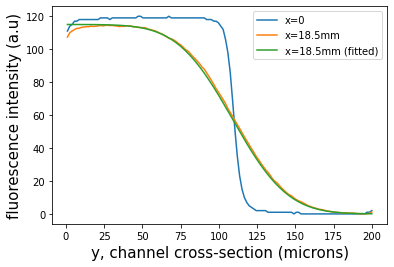

130
28.33164940130057
.//images/2124.tif
Concentration front: 111
Velocity: 8916.628215867377 um/s


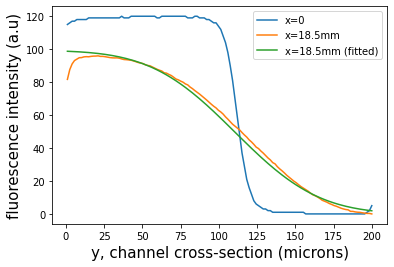

130
25.966905634640003
.//images/9582.tif
Concentration front: 111
Velocity: 34487.325325592705 um/s


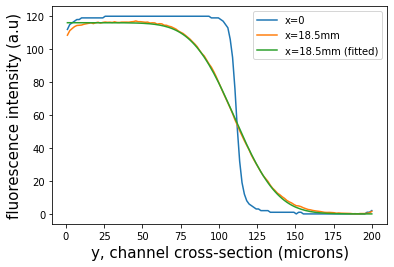

130
29.582137948417778
.//images/205183.tif
Concentration front: 104
Velocity: 31638.828764523034 um/s


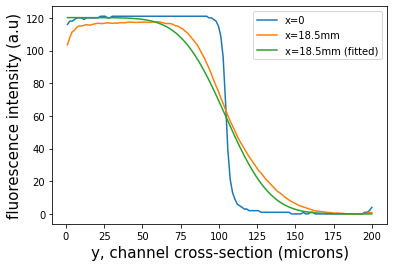

130
31.729444819644385
.//images/1815.tif
Concentration front: 126
Velocity: 10387.837119531958 um/s


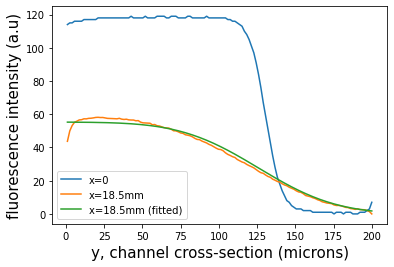

130
36.39113537788145
.//images/2424.tif
Concentration front: 38
Velocity: 5119.998942894866 um/s


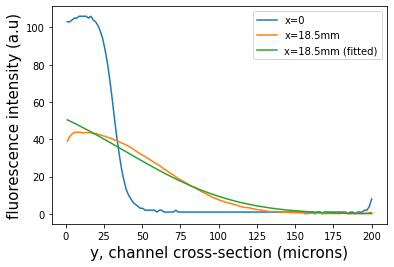

130
57.20901876685273
.//images/168150.tif
Concentration front: 103
Velocity: 40744.33507960918 um/s


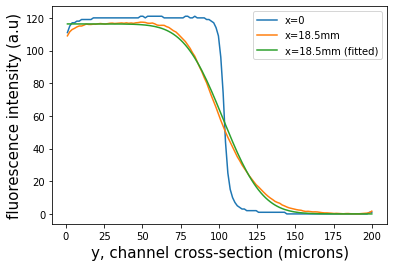

130
33.0158654904856
.//images/278250.tif
Concentration front: 104
Velocity: 17094.86263902792 um/s


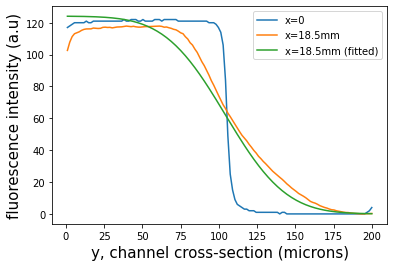

130
29.185645669948748


In [ ]:
list_img=os.listdir(root+'/images')
depth_j=len(list_img)
# Plot experimental results
for j in range(depth_j):
    path_current=root+'/images/'+list_img[j]
    img=cv2.imread(path_current,-1)
    print(path_current)
    img_init = img[INIT_FIRST_EDGE:INIT_SECOND_EDGE, :]
    img_fin = img[FIN_FIRST_EDGE:FIN_SECOND_EDGE, :]
    line_init = np.mean(img_init,axis=1)
    line_init = np.array(line_init).astype('uint')
    min_line_init = np.min(line_init)
    line_init = line_init - min_line_init

    x = np.linspace(1, CHANNEL_WIDTH, len(line_init))

    for y_index in range(len(line_init) - 1, -1, -1):
      if line_init[y_index] > np.mean(line_init):
        c_front = x[y_index]
        print("Concentration front: " + str(round(c_front)))
        break
        
    fixed_mixer_with_front = lambda x,u,coeff: fixed_mixer(x,u,coeff, c_front)
    plt.plot(x, line_init, label="x=0")
    line_fin = np.mean(img_fin,axis=1)
    line_fin = np.array(line_fin).astype('float')
    line_fin = line_fin[::-1]
    min_line_fin = np.min(line_fin)
    line_fin = line_fin - min_line_fin
    
    plt.plot(x, line_fin, label="x=18.5mm")
    popt, pcov = curve_fit(fixed_mixer_with_front, x, line_fin, bounds=([0.0001, -100000000.0], 10000000.0), maxfev=100000)
    print("Velocity: " + str(popt[0]) + " um/s")
    plt.plot(x, fixed_mixer_with_front(x, popt[0], popt[1]), label="x=18.5mm (fitted)")
    plt.legend()
    plt.xlabel("y, channel cross-section (microns)", fontsize=15)
    plt.ylabel("fluorescence intensity (a.u)", fontsize=15)
    plt.show()

    initial_profile = np.array(x)
    final_profile = np.array(fixed_mixer_with_front(x, popt[0], popt[1]))

    mvc = np.mean((np.square(np.mean(initial_profile) - final_profile))) / final_profile.size
    print(initial_profile.size)
    print(mvc)

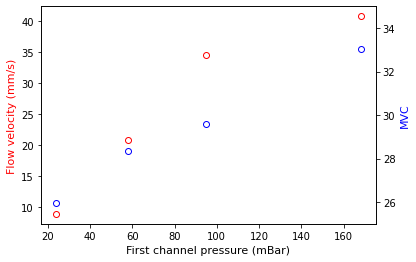

In [ ]:
P = [24, 58, 95, 168]
V = [8.916, 20.740, 34.487, 40.744]
mixing = [25.97, 28.33, 29.58, 33.02]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(P, V, 'o',mfc='none', c='r')

ax2.plot(P, mixing, 'o', mfc='none', c='b')
ax2.set_ylim([25,35])
ax1.set_ylabel('Flow velocity (mm/s)', fontsize=11, color='red')
ax2.set_ylabel('MVC', fontsize=11, color='blue')
ax1.set_xlabel('First channel pressure (mBar)', fontsize=11)
plt.show()

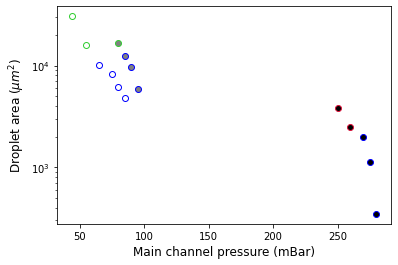

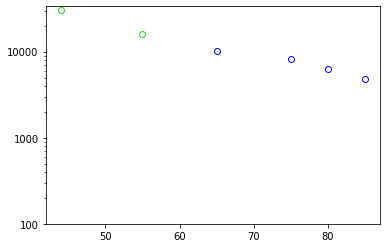

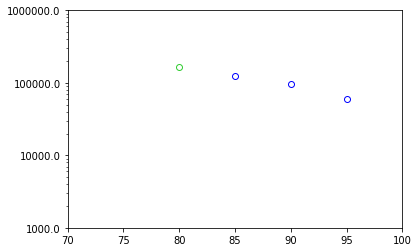

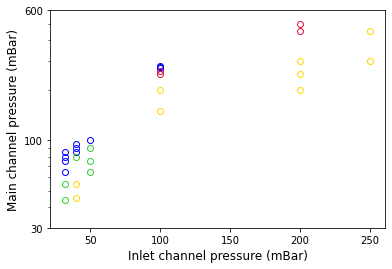

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


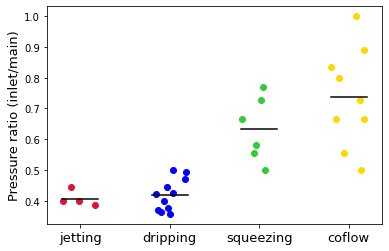

In [ ]:
dripping_P1 = [100, 100, 100, 50, 40, 40, 40, 32, 32, 32, 32]
dripping_P2 = [280, 275, 270, 100, 95, 90, 85, 85, 80, 75, 65]

squeezing_P1 = [50, 50, 50, 40, 32, 32]
squeezing_P2 = [90, 75, 65, 80, 55, 44]

coflow_P1 = [250, 250, 200, 200, 200, 100, 100, 40, 40]
coflow_P2 = [450, 300, 300, 250, 200, 200, 150, 55, 45]

jetting_P1 = [200, 200, 100, 100]
jetting_P2 = [500, 450, 260, 250]


dripping_size_32 = [10207, 8171, 6221, 4778]
dripping_P_32 = [65, 75, 80, 85]
squeezing_size_32 = [30611, 15837]
squeezing_P_32 = [44, 55]

squeezing_size_40 = [16742]
squeezing_P_40 = [80]
dripping_size_40 = [12469, 9677, 5945]
dripping_P_40 = [85, 90, 95]

dripping_size_100 = [1963, 1134, 346]
dripping_P_100 = [270, 275, 280]
jetting_size_100 = [3848, 2500]
jetting_P_100 = [250, 260]

fig, ax1 = plt.subplots()

ax1.semilogy(dripping_P_100, dripping_size_100, 'o',mfc='black', c='blue')
ax1.semilogy(jetting_P_100, jetting_size_100, 'o',mfc='black', c='crimson')
ax1.semilogy(dripping_P_40, dripping_size_40, 'o',mfc='grey', c='blue')
ax1.semilogy(squeezing_P_40, squeezing_size_40, 'o',mfc='grey', c='limegreen')
ax1.semilogy(dripping_P_32, dripping_size_32, 'o',mfc='none', c='blue')
ax1.semilogy(squeezing_P_32, squeezing_size_32, 'o',mfc='none', c='limegreen')

ax1.set_ylabel("Droplet area ($\mu$$m^2$)",fontsize=12)
ax1.set_xlabel("Main channel pressure (mBar)",fontsize=12)
plt.show()

fig, ax1 = plt.subplots()

ax1.semilogy(dripping_P_32, dripping_size_32, 'o',mfc='none', c='blue')
ax1.semilogy(squeezing_P_32, squeezing_size_32, 'o',mfc='none', c='limegreen')
ax1.set_yticks([100, 1000, 10000])
ax1.set_yticklabels([100, 1000, 10000])
plt.show()

fig, ax1 = plt.subplots()

ax1.semilogy(dripping_P_40, dripping_size_40, 'o',mfc='none', c='blue')
ax1.semilogy(squeezing_P_40, squeezing_size_40, 'o',mfc='none', c='limegreen')
ax1.set_yticks([100, 1000, 10000, 100000])
ax1.set_yticklabels([10e2, 10e3, 10e4, 10e5])
ax1.set_xlim([70, 100])
plt.show()

fig, ax1 = plt.subplots()

ax1.semilogy(dripping_P1, dripping_P2, 'o',mfc='none', c='blue')
ax1.semilogy(squeezing_P1, squeezing_P2, 'o',mfc='none', c='limegreen')
ax1.semilogy(coflow_P1, coflow_P2, 'o',mfc='none', c='gold')
ax1.semilogy(jetting_P1, jetting_P2, 'o',mfc='none', c='crimson')
ax1.set_ylabel("Main channel pressure (mBar)",fontsize=12)
ax1.set_xlabel("Inlet channel pressure (mBar)",fontsize=12)
ax1.set_yticks([30, 100, 600])
ax1.set_yticklabels([30, 100, 600])
plt.show()


dripping = np.array(dripping_P1) / np.array(dripping_P2)
squeezing = np.array(squeezing_P1) / np.array(squeezing_P2)
coflow = np.array(coflow_P1) / np.array(coflow_P2)
jetting = np.array(jetting_P1) / np.array(jetting_P2)


labels = ["jetting", "dripping", "squeezing", "coflow"]
colors = ["crimson", "blue", "limegreen", "gold"]
data = np.array([jetting, dripping, squeezing, coflow])
width=0.4
fig, ax = plt.subplots()
for i, l in enumerate(labels):
    x = np.ones(data[i].shape[0])*i + (np.random.rand(data[i].shape[0])*width-width/2.)
    ax.scatter(x, data[i], color=colors[i])
    mean = data[i].mean()
    ax.plot([i-width/2., i+width/2.],[mean,mean], color="k")

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, fontsize=13)
ax.set_ylabel("Pressure ratio (inlet/main)", fontsize=13)

plt.show()

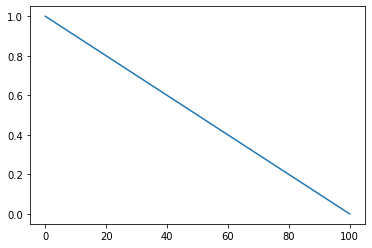

In [ ]:
# Gradient generator
# returns (Concentration, Pressure)
P1 = 150
P2 = 150
WIDTH = 100
def gradient_generator(V, B):
  if V == 0:
    return (1,P1/(2**(B - 2)))
  if V == (B - 1):
    return (0,P2/(2**(B - 2)))

  first = gradient_generator(V, B - 1)
  sec =  gradient_generator(V - 1, B - 1)
  return (first[1] / (first[1] + sec[1]) * first[0] + sec[1] / (first[1] + sec[1]) * sec[0], (first[1] + sec[1]) / 2)


gradient = []
for g in range(5):
  gradient.append(gradient_generator(g,5)[0])

# Plot conc. to channel width
x = np.linspace(0,WIDTH, 5)
plt.plot(x, gradient)


